In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

df_ALL = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
#df_ALL.head()
df_ffq = pd.read_sas("./hn16_ffq.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
#df_ffq.head()

df = pd.merge(df_ALL, df_ffq, how='left', on=[
                                  'mod_d', # 최종DB 수정일
                                  'ID', # 개인 아이디
                                  'ID_fam', # 가구 아이디
                                  'year', # 조사연도
                                  'region', # 17개 시도
                                  'town_t', # 동/읍면 구분
                                  'apt_t', # 아파트 구분, 1.일반, 2.아파트
                                  'psu', # 조사구번호
                                  'sex', # 성별, 1.남자, 2.여자
                                  'age', # 만나이, 80은 80이상 포함(탑코딩)
                                  'age_month', # 만 1~6세의 경우 개월수(월령)
                                  'incm', # 소득 사분위수(개인), 1.하, 2.중하, 3.중상, 4.상
                                  'ho_incm', # 소득 사분위수(가구),  1.하, 2.중하, 3.중상, 4.상
                                  'edu', # 교육수준 재분류 코드, 1.초졸이하, 2.중졸, 3.고졸, 4.대졸이상
                                  'occp', # 직업재분류 및 실업/비경제활동 상태코드
                                  'wt_hs', # 가구조사 가중치
                                  'wt_itvex', # 건강설문-검진조사 가중치
                                  'wt_pft', # 폐기능검사 가중치(만40세이상)
                                  'wt_hm', # 중금속검사 가중치(만10세이상)
                                  'wt_ntr', # 영양조사 가중치
                                  'wt_tot', # 건강설문-검진조사 & 영양조사 가중치
                                  'wt_pfhm', # 폐기능검사 & 중금속검사 가중치(만40세이상)
                                  'wt_pfnt', # 폐기능검사 & 영양조사 가중치(만40세이상)
                                  'wt_hmnt', # 중금속검사 & 영양조사 가중치(만10세이상)
                                  'wt_pfhmnt', # 폐기능검사 & 중금속검사 & 영양조사 가중치(만40세이상)
                                  'kstrata' # 분산추정 층
                                 ])

df_data = df.loc[(18 < df.age), :]

df_data = df_data.loc[(1 < df_data.DI1_pt) | (df_data.DI1_pt < 1), :]

In [5]:
#column_list = ['sex', 'age', 'incm', 'ho_incm', 'edu', 'occp','HE_sbp','HE_dbp']
column_list1 = [
                 'HE_rPLS'
                , 'HE_nARM'
                , 'HE_wt'
                , 'HE_HB'
                , 'HE_HCT'
                , 'HE_BMI'
                , 'HE_RBC'
                , 'HE_wc'
                , 'HE_obe'
                , 'HE_TG'
                , 'HE_sbp', 'HE_dbp']

column_list2 = [
                 'HE_alt'
                , 'GS_mea_r_3'
                , 'GS_mea_l_2'
                , 'GS_mea_r_2'
                , 'GS_mea_r_1'
                , 'GS_mea_l_1'
                , 'GS_mea_l_3'
                , 'HE_Uacid'
                , 'HE_HPfh2'
                , 'HE_fh'
                , 'HE_sbp', 'HE_dbp']

column_list3 = [
                 'LW_mp_a'
                , 'HE_HPfh3'
                , 'LW_mt_a1'
                , 'HE_HPfh1'
                , 'HE_prg'
                , 'LW_ms'
                , 'HE_STRfh1'
                , 'LW_pr_1'
                , 'LW_mt'
                , 'LW_br'
                , 'HE_sbp', 'HE_dbp']

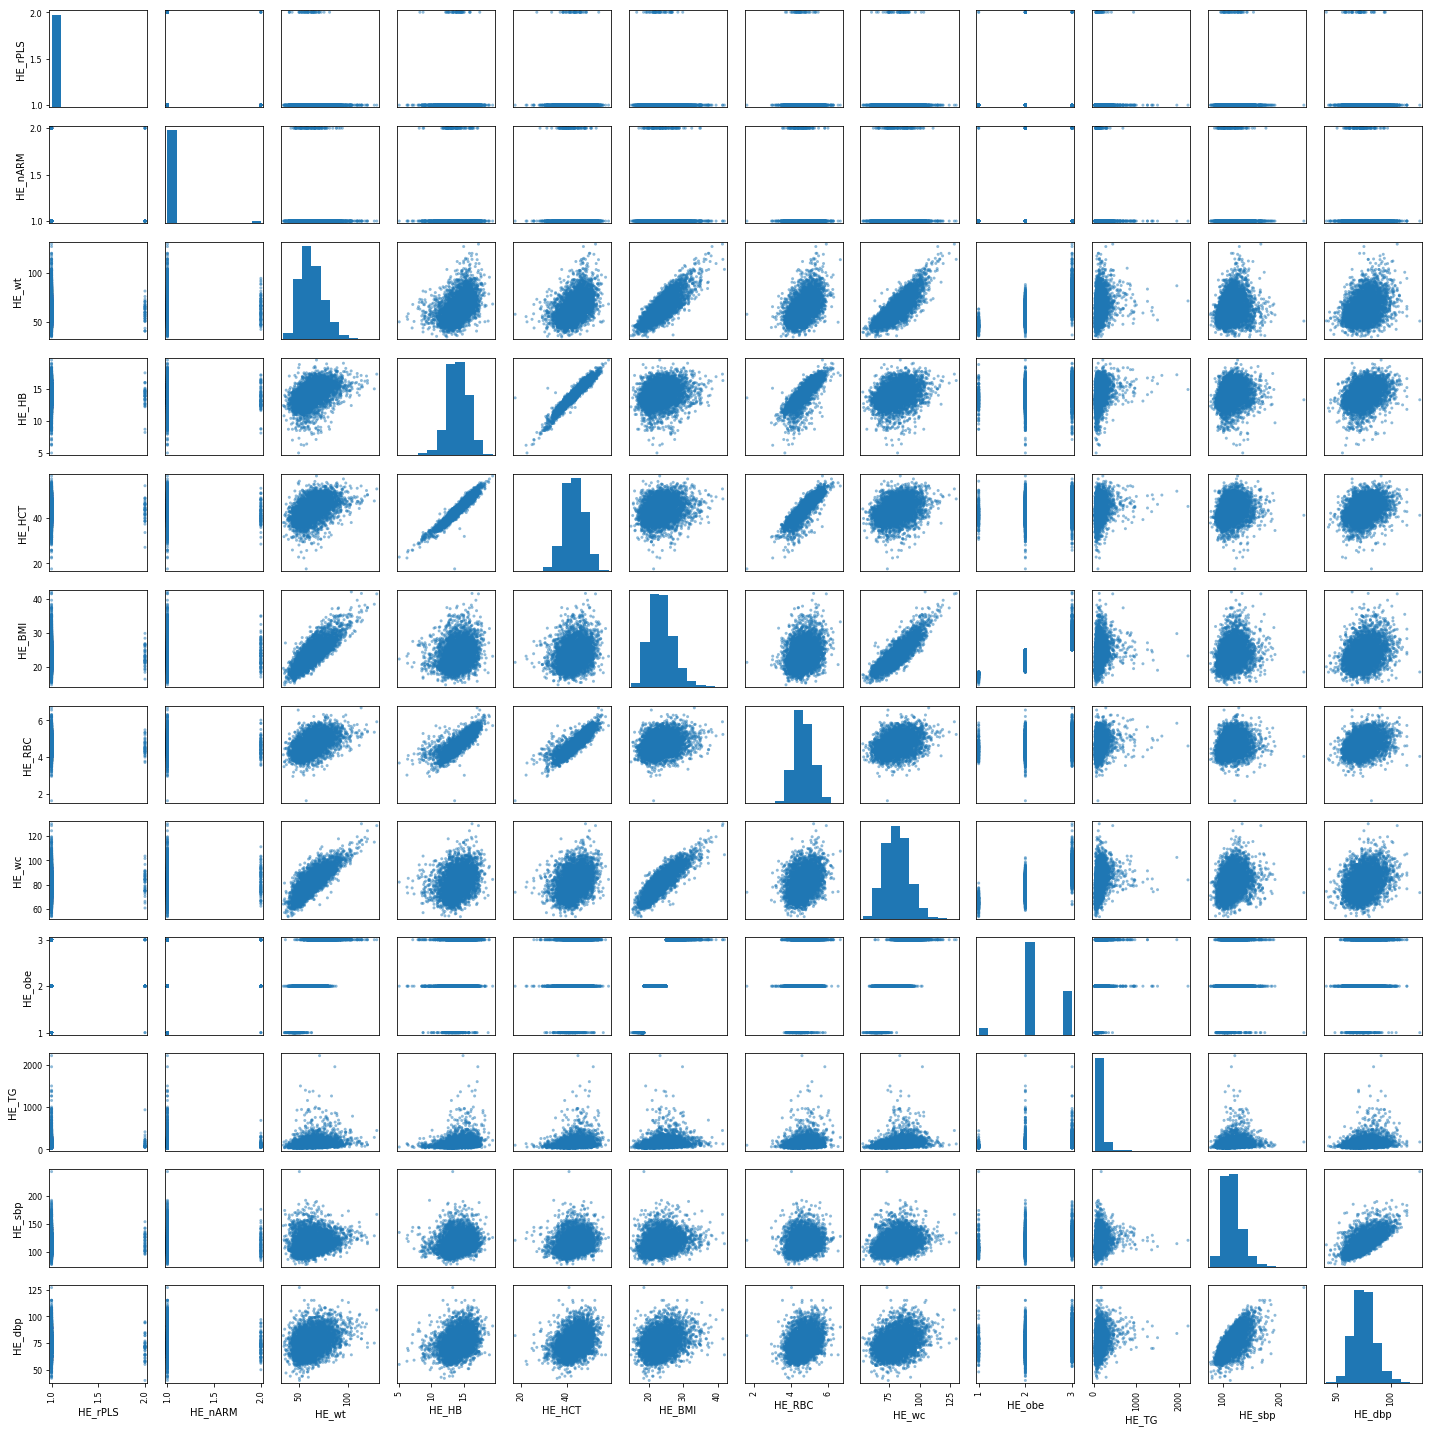

In [6]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=column_list1), figsize=[20,20])
plt.tight_layout()
plt.savefig("20181105_1.png")
plt.show()

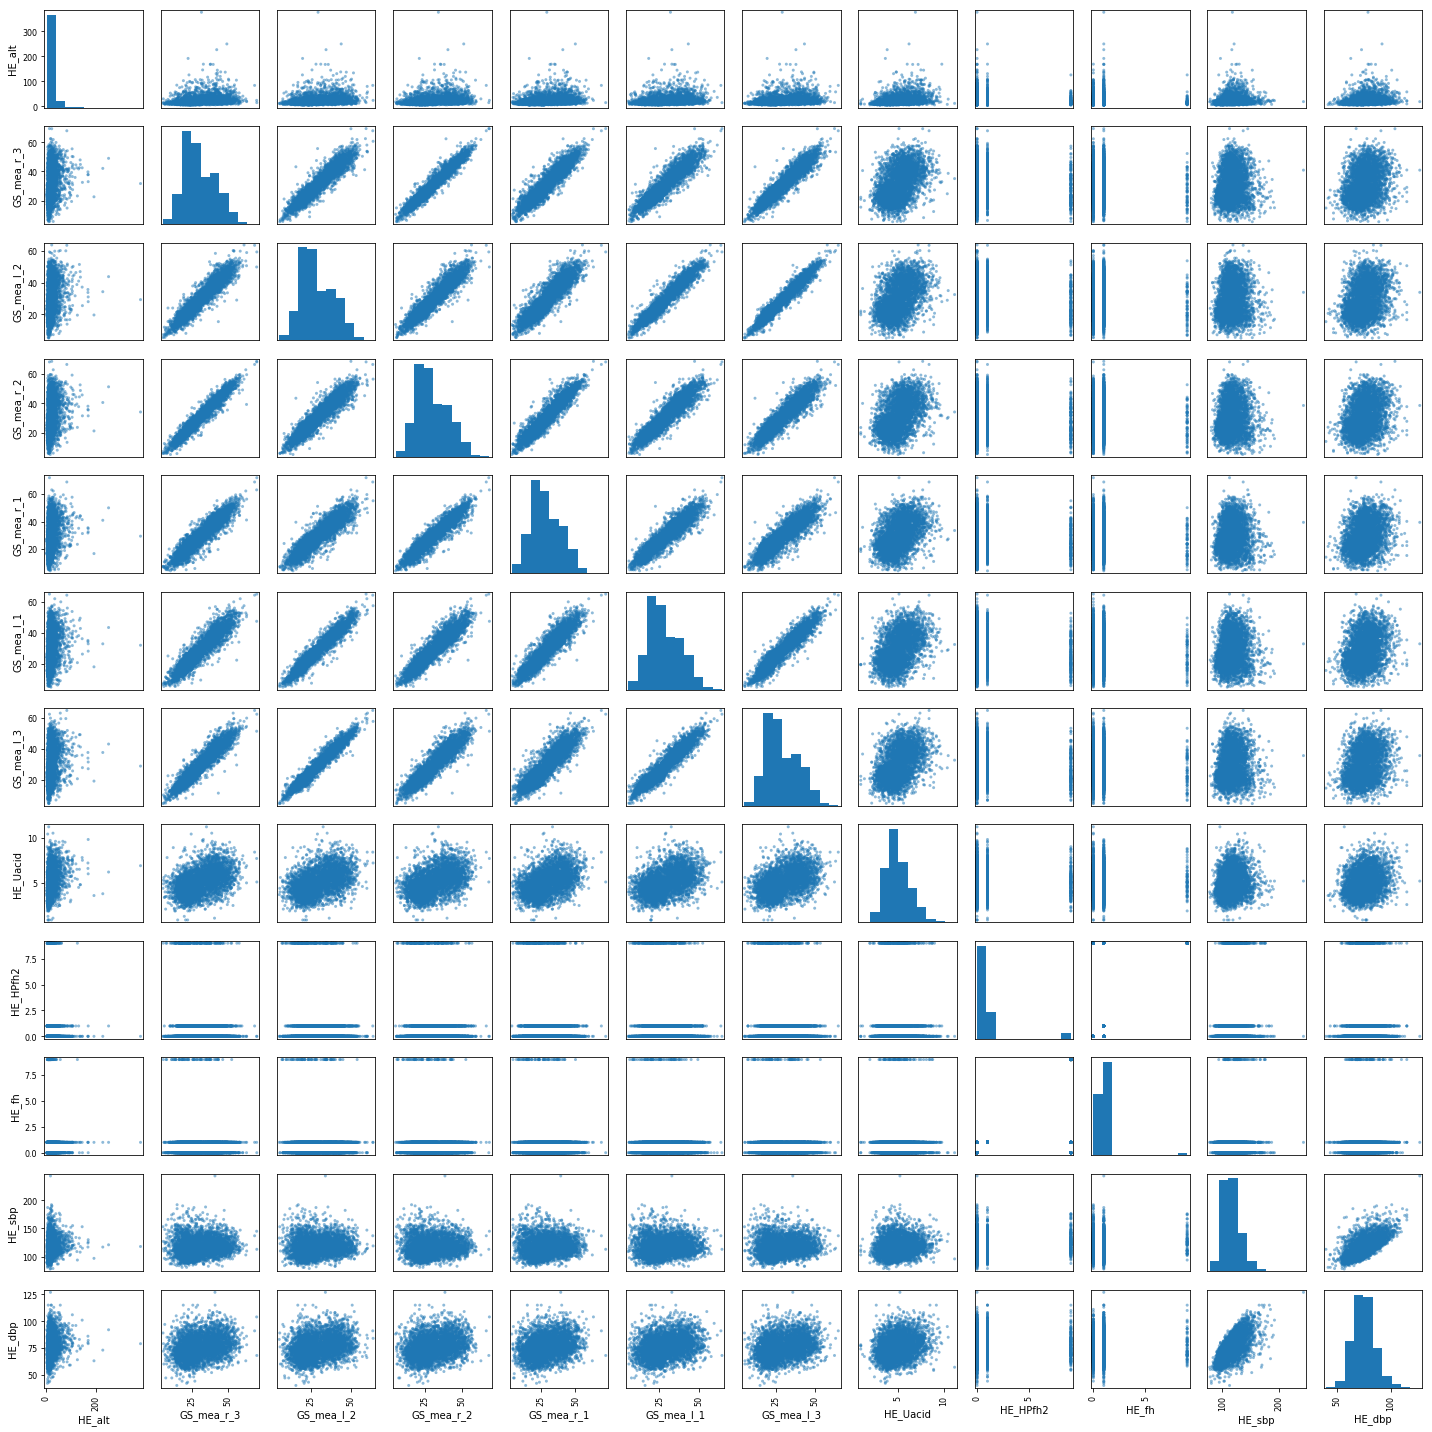

In [7]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=column_list2), figsize=[20,20])
plt.tight_layout()
plt.savefig("20181105_2.png")
plt.show()

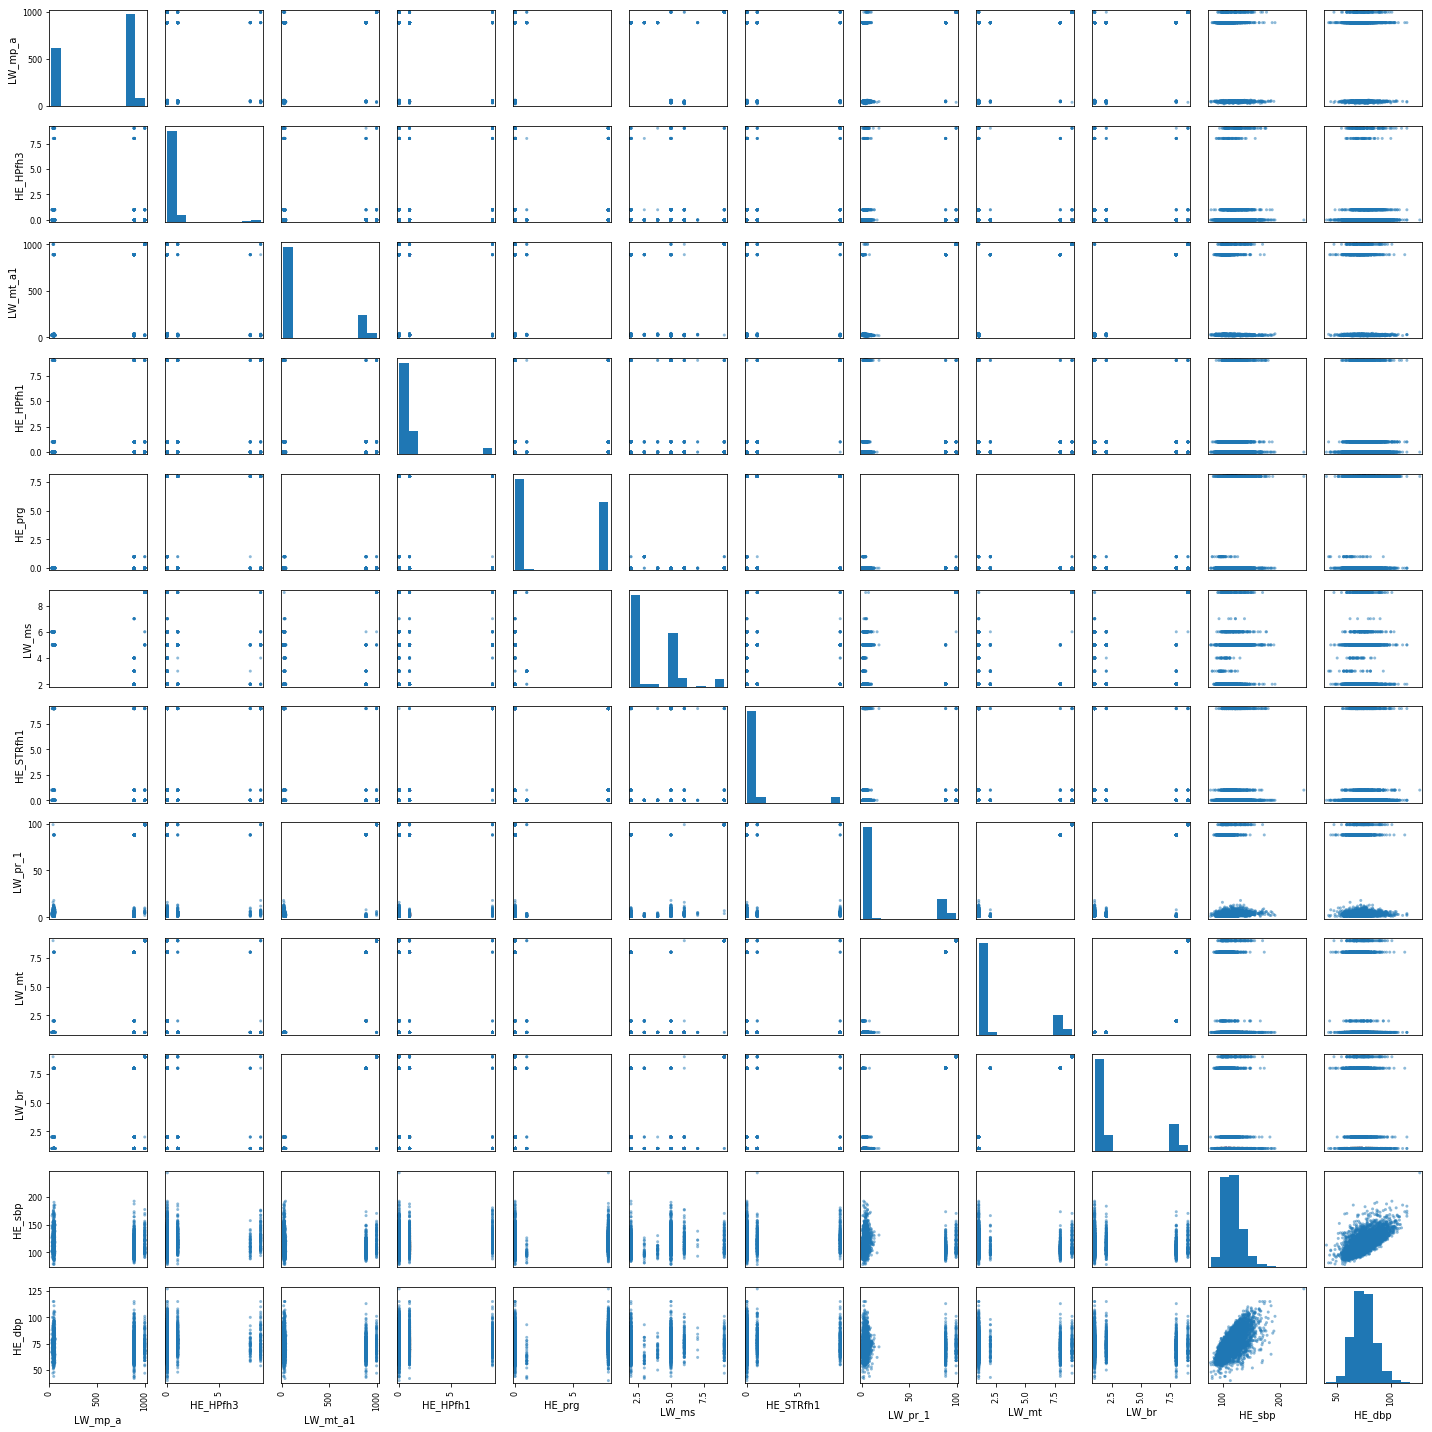

In [8]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=column_list3), figsize=[20,20])
plt.tight_layout()
plt.savefig("20181105_3.png")
plt.show()

In [9]:
column_list4 = [
                'HE_nARM'
                ,'HE_rPLS'
                ,'age'
                ,'LW_ms'
                ,'LW_mp_a'
                ,'T_NQ_FIR'
                ,'T_Q_HR'
                ,'T_NQ_PH'
                ,'T_NQ_OCP'
                ,'T_Q_VN'
                , 'HE_sbp', 'HE_dbp']

column_list5 = [
                'T_NQ_LS'
                ,'HE_wc'
                ,'educ'
                ,'LW_mt_a1'
                ,'HE_sput1'
                ,'HE_cough1'
                ,'HE_PFTdr'
                ,'HE_ast'
                ,'HE_HPfh3'
                ,'edu'
                , 'HE_sbp', 'HE_dbp']

column_list6 = [
                'LW_br_mm'
                ,'HE_glu'
                ,'HE_THfh2'
                ,'HE_STRfh2'
                ,'HE_IHDfh2'
                ,'HE_DMfh2'
                ,'HE_HPfh2'
                ,'HE_HLfh2'
                ,'LW_ms_a'
                ,'HE_DMfh1'
                , 'HE_sbp', 'HE_dbp']

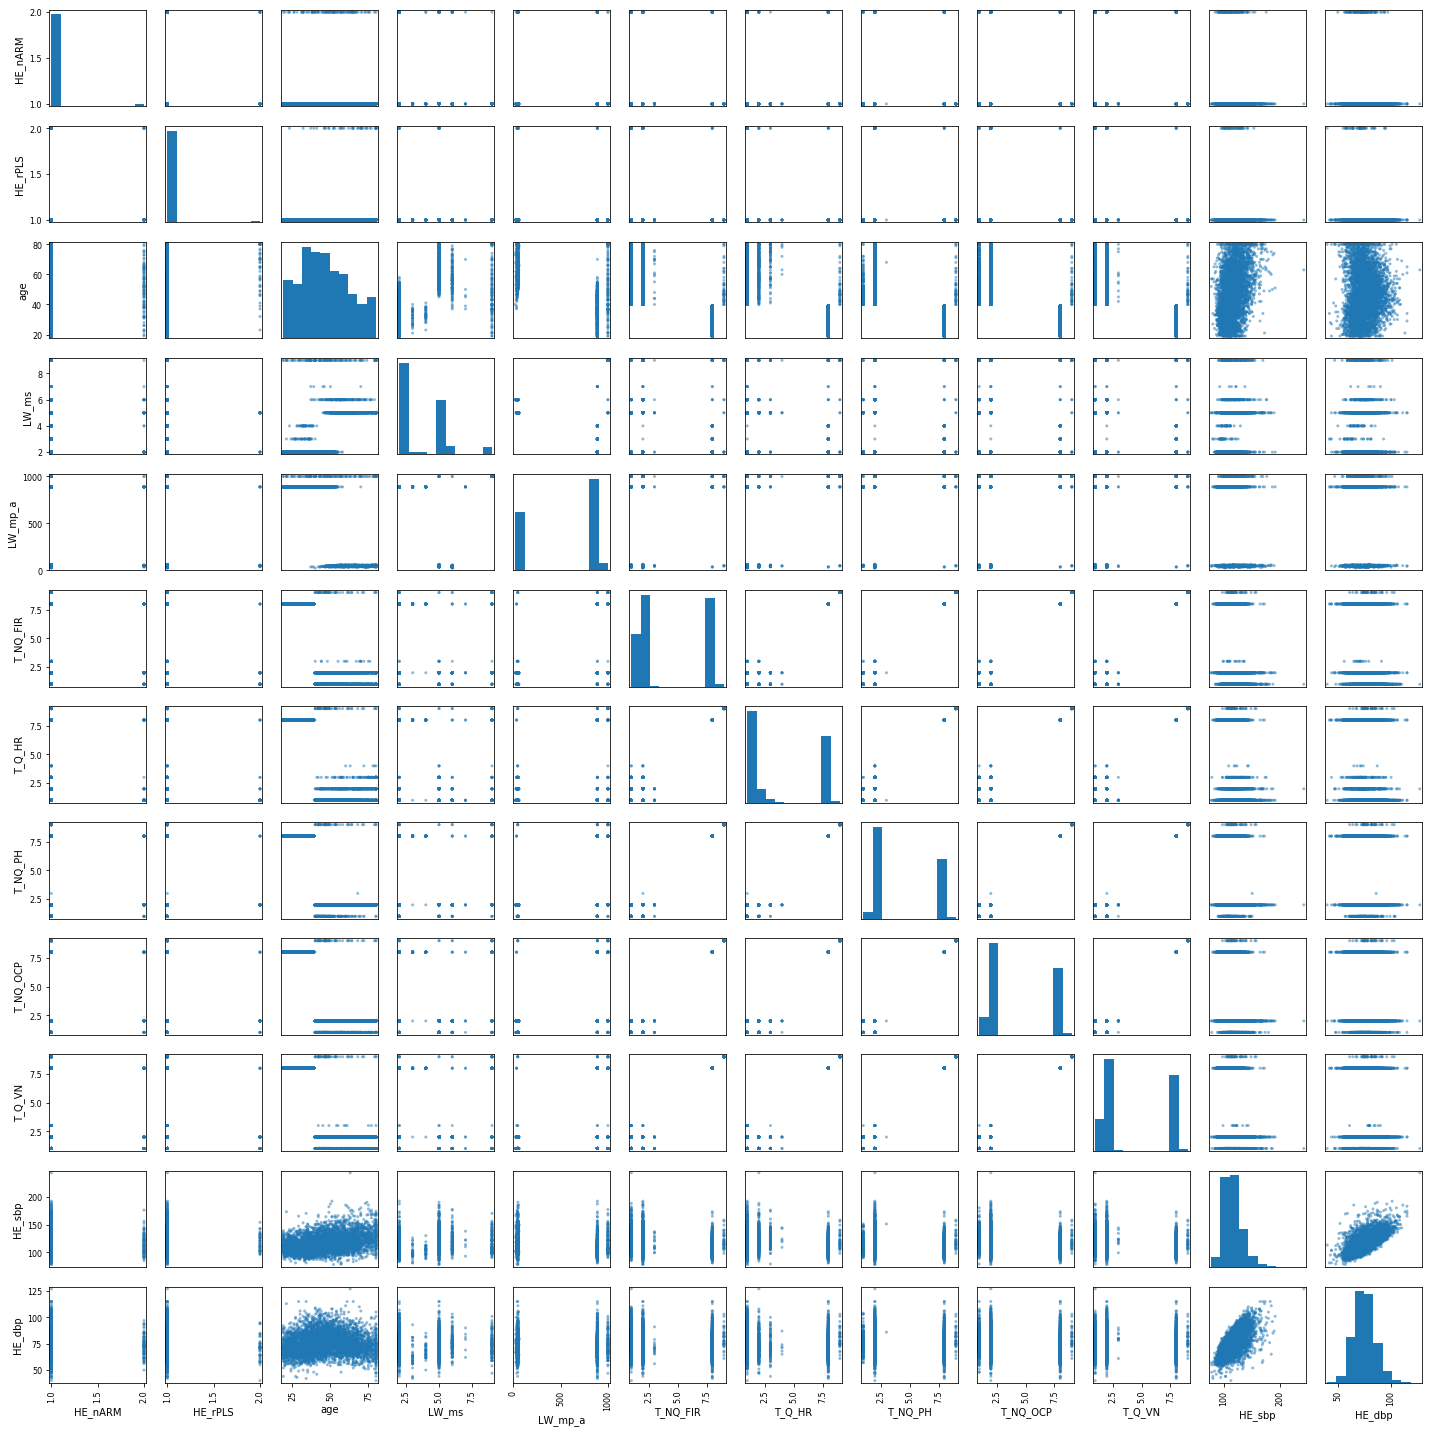

In [10]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=column_list4), figsize=[20,20])
plt.tight_layout()
plt.savefig("20181105_4.png")
plt.show()

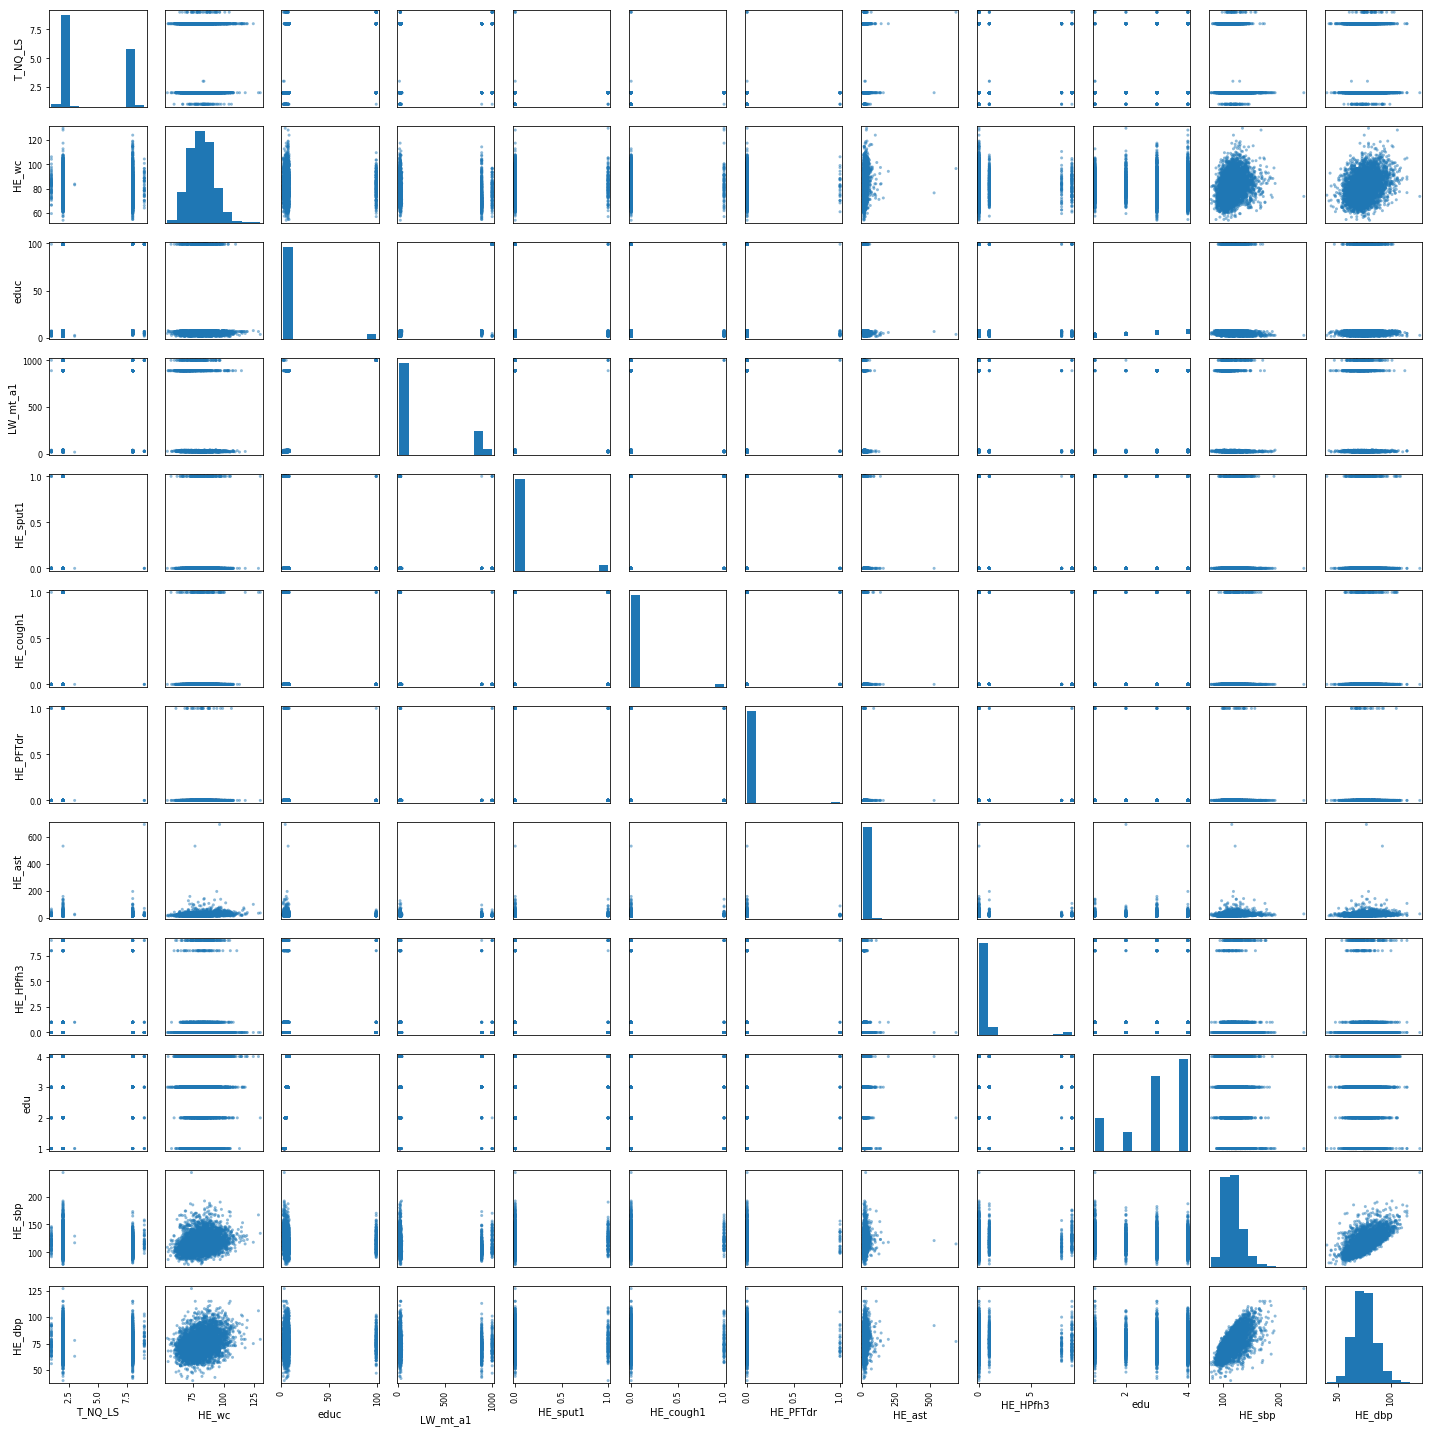

In [11]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=column_list5), figsize=[20,20])
plt.tight_layout()
plt.savefig("20181105_5.png")
plt.show()

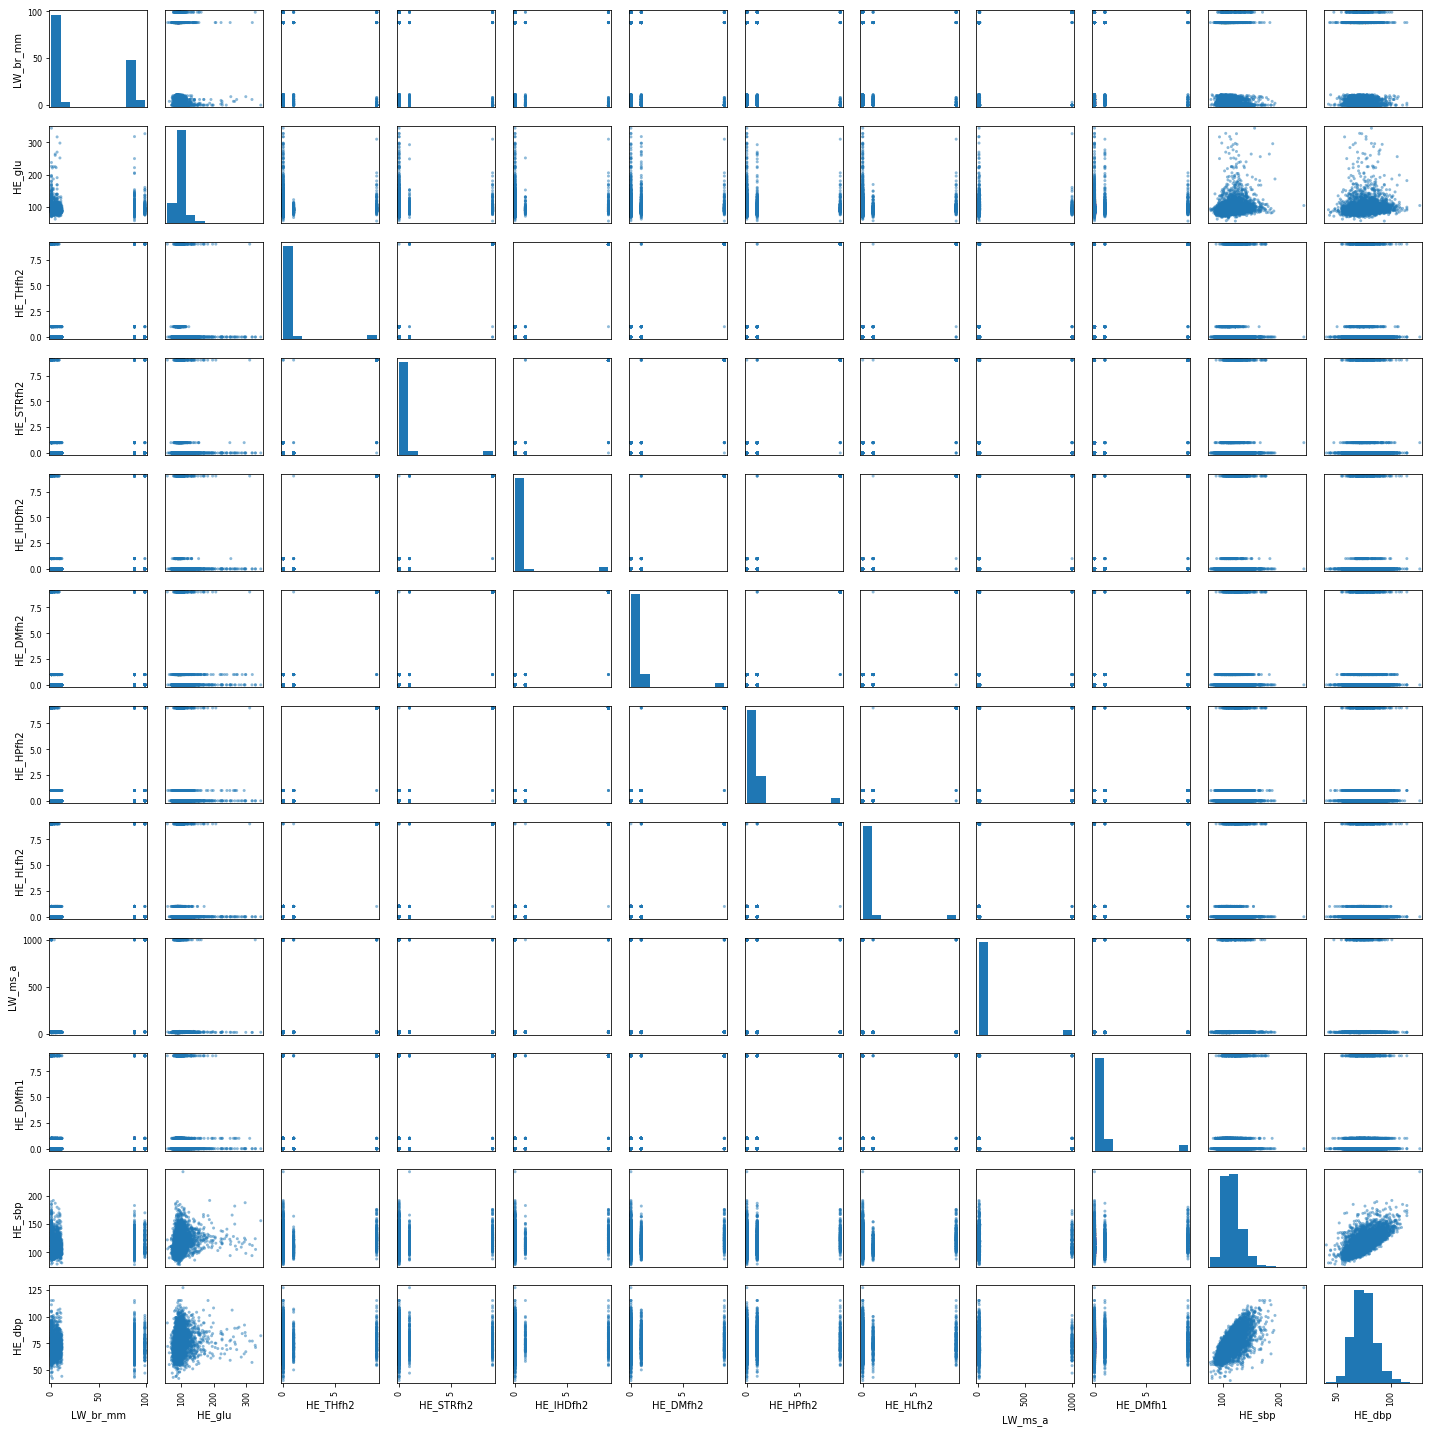

In [12]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=column_list6), figsize=[20,20])
plt.tight_layout()
plt.savefig("20181105_6.png")
plt.show()